## Carregamento e análise dos dados

### Load do Dataset que vai servir de base para nosso treinamento

In [1]:
from tensorflow import keras

# Definição do nosso Dataset com as informações da base de dados do keras
dataset = keras.datasets.fashion_mnist

# dataset.load_data() => retorna um conjunto de duas tuplas com as informações de treino e teste
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

Dataset carregado atráves dos datasets padrões disponibilizados pelo Keras.

### Formato dos nossos dados

In [2]:
display(imagens_treino.shape)
display(imagens_teste.shape)

(60000, 28, 28)

(10000, 28, 28)

- Dataset de treino com 60.000 imagens de 28x28 pixels. 
- Dataset de teste com 10.000 imagens de 28x28 pixels.

In [3]:
display(identificacoes_treino.shape)
display(identificacoes_teste.shape)

(60000,)

(10000,)

Aqui temos as labels de cada foto tanto para o Dataset de treino, como para o Dataset de teste.

### Exibição de exemplos do nosso Dataset

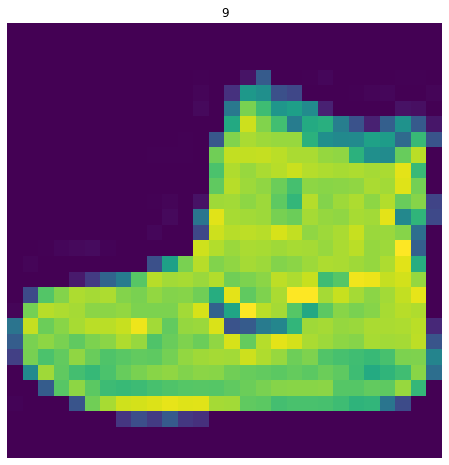

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

# Função da Lib para exibir imagens => passando o index de onde a imagem está
plt.imshow(imagens_treino[0])

# Função para colocar titulo no gráfico => passando o index da identificação do nosso treino
plt.title(identificacoes_treino[0])
plt.axis('off');

Exemplo de imagem que iremos analisar. Podemos perceber que alguns tratamentos já foram aplicados a essa imagem, como a remoção das cores, o que resulta em uma imagem mais leva para a rede neural analisar, pois agora temos apenas 1 canal com a escala de cinza.

In [5]:
display(identificacoes_treino.min())
display(identificacoes_treino.max())
total_classificacoes = 10
print(f"Total de classificações: {total_classificacoes}")

0

9

Total de classificações: 10


Temos um total de 10 tipos de roupa que vamos classificar.

### Escala de cor na imagem
 - Futuramente será feita uma redução para evitar "loss"

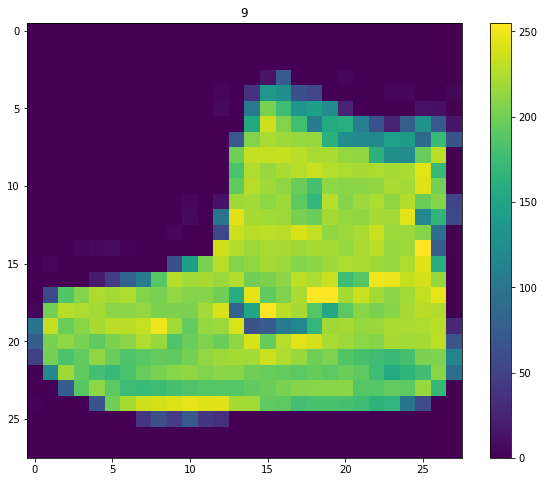

In [6]:
plt.figure(figsize=(10,8))
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
plt.colorbar();

### Exemplos de classificações dentro do Dataset

In [7]:
# Mapeamento dos nomes de cada classificação com base no Github oficial
nomes_classificacoes = ["Camiseta", "Calça", " Pullover", 
                        "Vestido", "Casaco", "Sandalha", 
                        "Camisa", "Tenis", "Bolsa", "Bota"]

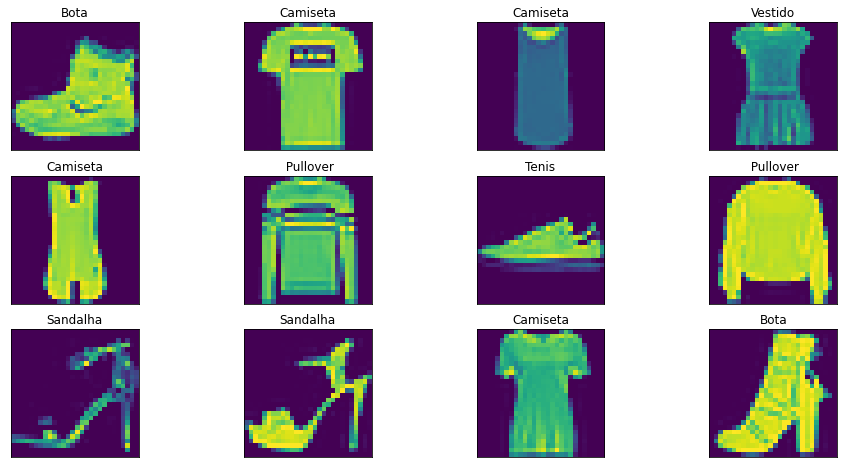

In [23]:
fig = plt.figure(figsize=(16,8))
for imagem in range(12):
    axes = fig.add_subplot(3, 4, imagem+1)
    # Função do subplot serve para mostrar diversas imagens dentro de um "for"
    # Passando o número de linhas, o número de colunas e a quantidade de repetição
    axes.imshow(imagens_treino[imagem])
    # nomes_classificacoes[identificacoes_treino[imagem]] => identificacoes_treino[imagem] retorna um número com a posição no
    # vetor de mapeamento para mostrar bonitinho nos gráficos
    axes.set_title(nomes_classificacoes[identificacoes_treino[imagem]])
    axes.set_xticks([])
    axes.set_yticks([])

## Construção do modelo
   - Modelo:
    - Entrada
    - Processamento
    - Saída

In [9]:
import tensorflow

# Normalização
# Escalonamento para reduzir o "loss"
# Divisão da escala de cor da imagem para ficar entre 0 e 1
imagens_treino = imagens_treino/255.0

# Sequencia de passos do modelo
model = keras.Sequential([
    # Entrada
    # Definição dos layers com o achatamento das nossas duas dimensões de para uma dimensão só
    keras.layers.Flatten(input_shape=(28, 28)), # Camada 0
    
    # Processamento
    # Número de "bolinhas" da camada e metodologia de ativação
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # Camada Densa, conectividade com todas as outras "bolinhas"
    
    # Adormecer camadas para evitar o vício
    keras.layers.Dropout(0.25), # Convenção de 20% dos neuronios dormindo
    
    # Camadas Ocultas
    # Teste de possíveis camadas intermediárias para verificar resultados diferentes
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.25),
    
    # Saída
    # Número de "bolinhas" é igual ao número de classificações que nós temos e a ativação
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

# É preciso compilar o modelo antes de treinar/testar
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinamento do modelo => passando o x, y e número de ciclos de treino que devem ser realizados
# Argumento para fazer validação no fit
historico = model.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6481 - accuracy: 0.7691 - val_loss: 0.4441 - val_accuracy: 0.8399
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4641 - accuracy: 0.8328 - val_loss: 0.3885 - val_accuracy: 0.8562
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4224 - accuracy: 0.8493 - val_loss: 0.3655 - val_accuracy: 0.8633
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4004 - accuracy: 0.8557 - val_loss: 0.3565 - val_accuracy: 0.8726
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3828 - accuracy: 0.8621 - val_loss: 0.3653 - val_accuracy: 0.8658
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3685 - accuracy: 0.8682 - val_loss: 0.3362 - val_accuracy: 0.8797
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3559 - accuracy: 0.8719 - val_loss: 0.3331 - val_accuracy:

## Analisando o resultado do treinamento e validação

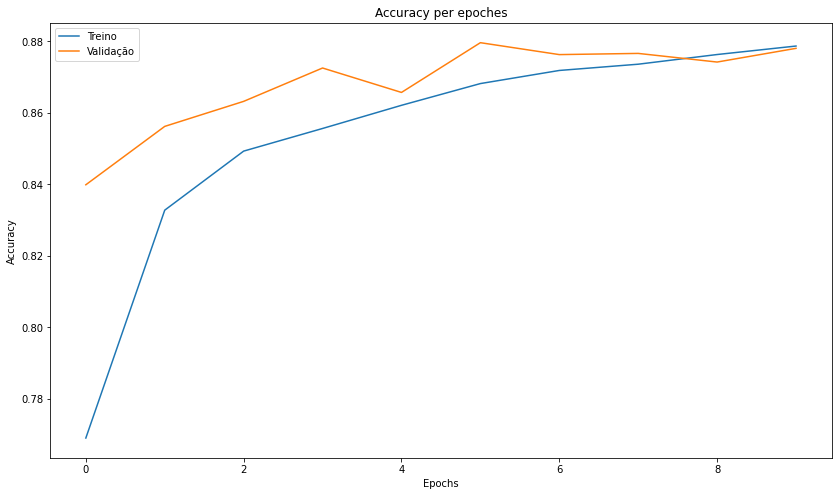

In [10]:
# Retorna um dicionário com todas as métricas do fit
# display(historico.history)

# Maneira de acessar as informações dentro do dicionário
val_acc = historico.history['val_accuracy']
acc = historico.history['accuracy']
val_loss = historico.history['val_loss']
loss = historico.history['loss']

plt.figure(figsize=(14,8))
plt.plot(acc)
plt.plot(val_acc)
plt.title("Accuracy per epoches")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Treino", "Validação"]);

Aqui podemos ver uma clara melhora na precisão ao longo das épocas de treino.

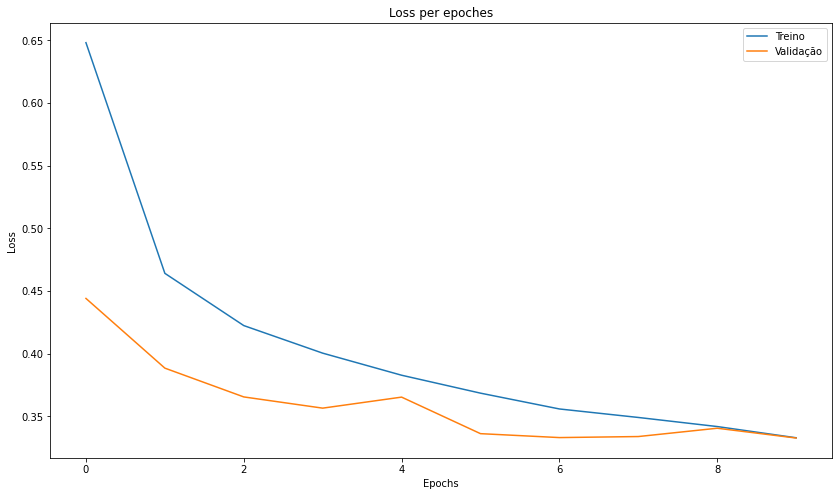

In [11]:
plt.figure(figsize=(14,8))
plt.plot(loss)
plt.plot(val_loss)
plt.title("Loss per epoches")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Treino", "Validação"]);

Temos uma boa redução da função custo com o passar da épocas de treinamento da rede neural.

## Validação dos dados

In [12]:
imagens_teste = imagens_teste/255.0

# Avaliação do modelo
# Retorna o "loss" e a accuracy do modelo
display(model.evaluate(imagens_teste, identificacoes_teste))

313/313 [==============================] - 1s 2ms/step - loss: 0.3674 - accuracy: 0.8690


[0.36743196845054626, 0.8690000176429749]

Conseguimos obter uma precisão de 86% para nosso conjunto de teste, o que é um resultado bem interessante no geral.